In [180]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from Bio import SeqIO
from Bio.Seq import Seq
from Bio.Alphabet import IUPAC
from Bio.SeqRecord import SeqRecord
from Bio import SeqUtils
from scipy.stats import gaussian_kde

In [192]:
def orf_translator(nuc, min_pro_len):
    t1,t2,s1,s2 = 0,0,0,0
    for frame in range(3):
        length = 3 * ((len(nuc)-frame) // 3) #Multiple of three
        for pro in nuc[frame:frame+length].translate(11).split("*"):
            if len(pro) >= min_pro_len:
                s1 = s1 + 1
        for pro in nuc[frame:frame+length].translate(1).split("*"):
            if len(pro) >= min_pro_len:
                t1 = t1 + 1
                
#         length = 3 * ((len(nuc.reverse_complement())-frame) // 3)
#         for pro in nuc.reverse_complement()[frame:frame+length].translate(11).split("*"):
#             if len(pro) >= min_pro_len:
#                 s2 = s2 + 1
                
#         for pro in nuc.reverse_complement()[frame:frame+length].translate(11).split("*"):
#             if len(pro) >= min_pro_len:
#                 t2 = t2 + 1
    s1 = max(s1,t1)
    s2 = max(s2,t2)        
        
    return s1

In [193]:
df = pd.read_csv('pndf.csv')
for i,r in df.iterrows():
    sq = Seq(r['Seq'], IUPAC.ambiguous_dna)
    df.loc[i,'Seq'] = sq

In [194]:
df['orfc ml200'] = 0
#df['s2 orfc'] = 0

for i,r in df.iterrows():
    c1 = orf_translator(r['Seq'],200)
    df.loc[i, 'orfc ml200'] = c1
    #df[i, 's2 orfc'] = c2
    

In [185]:
#df['fol'] = df['orfc ml200'].div(df['Len'])

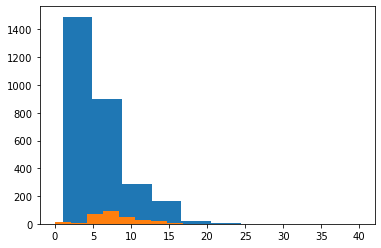

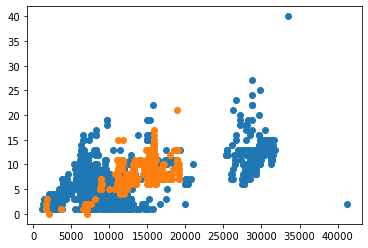

KeyboardInterrupt: 

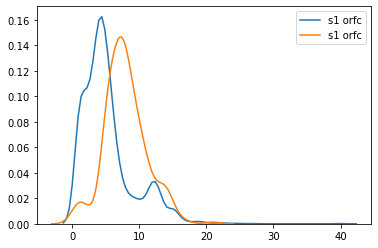

In [155]:
df['s1 orfc'] = 0
#df['s2 orfc'] = 0

for l in range(100,400,20):
    for i,r in df.iterrows():
        c1 = orf_translator(r['Seq'],l)
        df.loc[i, 's1 orfc'] = c1
        #df[i, 's2 orfc'] = c2
    plt.hist(df.loc[:2862, 's1 orfc'])
    plt.hist(df.loc[2862:, 's1 orfc'])
    plt.show()
    plt.scatter(df.loc[:2862, 'Len'], df.loc[:2862, 's1 orfc'])
    plt.scatter(df.loc[2862:, 'Len'], df.loc[2862:, 's1 orfc'])
    plt.show()
    sns.kdeplot(df.loc[:2862, 's1 orfc'])
    sns.kdeplot(df.loc[2862:, 's1 orfc'])
    #plt.show()

In [195]:
df = df.iloc[:, [0,-1]]

In [197]:
df.to_csv('Id orfc', index = False)

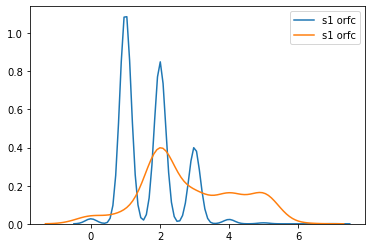

In [179]:
#500
sns.kdeplot(df.loc[:2862, 's1 orfc'])
sns.kdeplot(df.loc[2862:, 's1 orfc'])

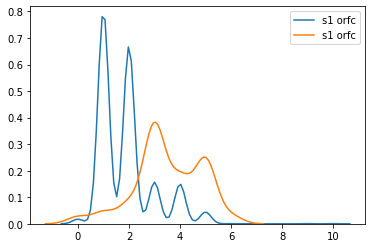

In [177]:
#400
sns.kdeplot(df.loc[:2862, 's1 orfc'])
sns.kdeplot(df.loc[2862:, 's1 orfc'])

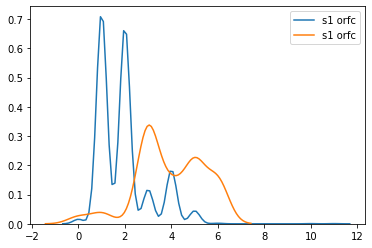

In [175]:
#350
sns.kdeplot(df.loc[:2862, 's1 orfc'])
sns.kdeplot(df.loc[2862:, 's1 orfc'])

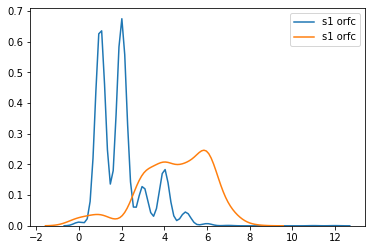

In [173]:
#300
sns.kdeplot(df.loc[:2862, 's1 orfc'])
sns.kdeplot(df.loc[2862:, 's1 orfc'])

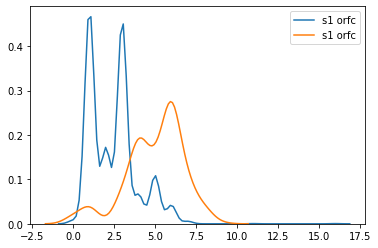

In [171]:
#250
sns.kdeplot(df.loc[:2862, 's1 orfc'])
sns.kdeplot(df.loc[2862:, 's1 orfc'])

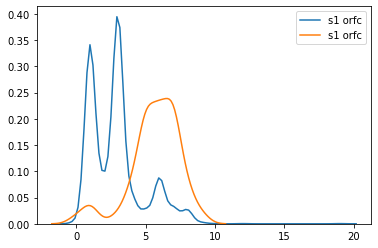

In [169]:
#200
sns.kdeplot(df.loc[:2862, 's1 orfc'])
sns.kdeplot(df.loc[2862:, 's1 orfc'])

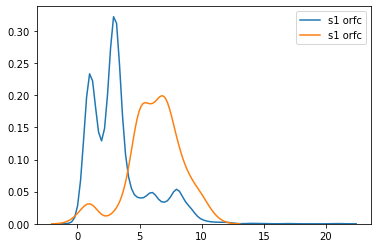

In [167]:
#150
sns.kdeplot(df.loc[:2862, 's1 orfc'])
sns.kdeplot(df.loc[2862:, 's1 orfc'])

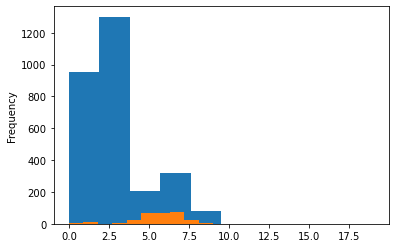

In [125]:
df.loc[:2862, 's1 orfc'].plot(kind='hist')
df.loc[2862:, 's1 orfc'].plot(kind='hist')

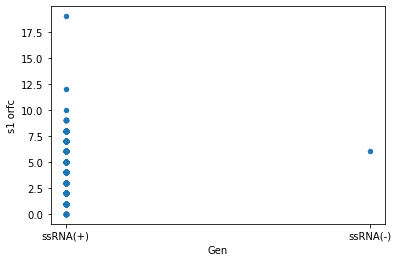

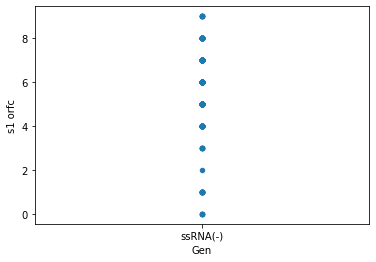

In [131]:
df.loc[:2862,].plot(x = 'Gen', y = 's1 orfc', kind='scatter')
df.loc[2862:,].plot(x = 'Gen', y = 's1 orfc', kind='scatter')

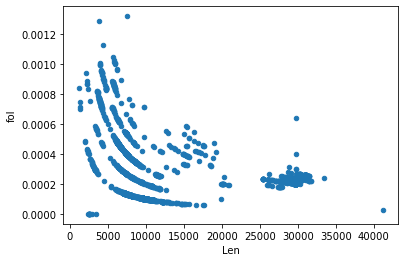

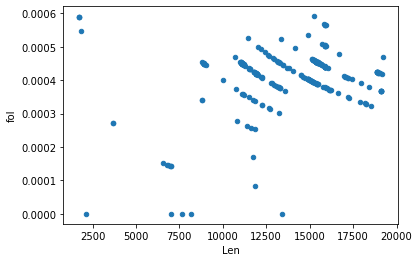

In [130]:
df.loc[:2862,].plot(x = 'Len', y = 'fol', kind='scatter')
df.loc[2862:,].plot(x = 'Len', y = 'fol', kind='scatter')

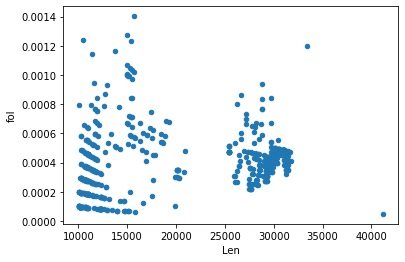

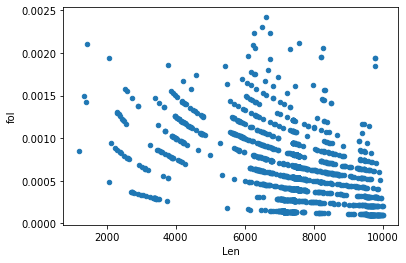

In [111]:
df.loc[df['Len'] > 10000].loc[:2862, :].plot(x = 'Len', y = 'fol', kind='scatter')
df.loc[df['Len'] < 10000].loc[:2862, :].plot(x = 'Len', y = 'fol', kind='scatter')
#df.loc[df['Len'] > 0].loc[2862:, :].plot(x = 'Len', y = 'fol', kind='scatter')

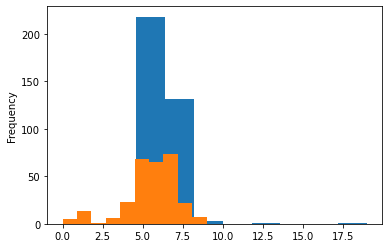

In [127]:
df.loc[df['Len'] > 22000].loc[:2862, 's1 orfc'].plot(kind='hist')
df.loc[df['Len'] < 22000].loc[2862:, 's1 orfc'].plot(kind='hist')

#unique overlapping trend between + strand >22k and - strands. When min-prot-length is 200

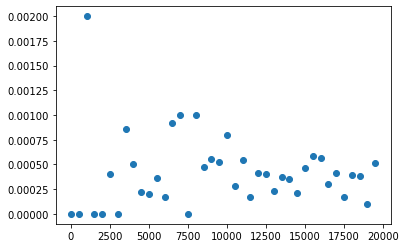

In [102]:
import random
len_score = []
for i in range(1,20000,500):
    rs = ''.join(random.choice('ATGC') for _ in range(i))
    
    rsq = Seq(rs, IUPAC.ambiguous_dna)
    
    len_score.append((len(rs), orf_translator(rsq, 100)/len(rs)))

a = np.array(len_score)
plt.scatter(a[:,0],a[:,1])